# READ DATA

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
#abrimos las matrices de adyacencia por amistad.
Friendship1  = np.loadtxt('friendship1.txt')
Friendship2  = np.loadtxt('friendship2.txt') 
Friendship3  = np.loadtxt('friendship3(copia).txt')
sexos=np.loadtxt('sex.F.txt')

In [3]:
F1=np.matrix(Friendship1)
F2=np.matrix(Friendship2)
F3=np.matrix(Friendship3)
sexos=np.array(sexos)

In [4]:
alcohol= np.loadtxt('alcohol(copia).txt',dtype=int, usecols=(0,1,2))
alcohol=np.array(alcohol)

cannabis= np.loadtxt('cannabis(copia).txt',dtype=int, usecols=(0,1,2))
cannabis=np.array(cannabis)

tobacco = np.loadtxt('tobacco(copia).txt',dtype=int, usecols=(0,1,2))
tobacco =np.array(tobacco)

In [5]:
imalos=[]
for i in range(160):
    if 1.0*(F1[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F2[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F3[i,:]==10).sum()==160:
        imalos.append(i)
        
#     if 0 in alcohol[i]:
#         imalos.append(i)
        
#     if 0 in cannabis[i]:
#         imalos.append(i)
        
#     if 0 in tobacco[i]:
#         imalos.append(i)

In [6]:
160-len(list(set(imalos)))

134

In [7]:
malos=list(set(imalos))
malos=np.sort(malos)

In [8]:
F1=np.delete(F1, malos,0)
F1=np.delete(F1, malos,1)

F2=np.delete(F2, malos,0)
F2=np.delete(F2, malos,1)

F3=np.delete(F3, malos,0)
F3=np.delete(F3, malos,1)

sexos=np.delete(sexos,malos)

# alcohol=np.delete(alcohol, malos,0)
# cannabis=np.delete(cannabis, malos,0)
# tobacco=np.delete(tobacco, malos,0)

In [9]:
import networkx as nx

In [10]:
f1=F1.copy()
f1_sin_peso=(f1==0)==False
f1_sin_peso=np.where(f1_sin_peso==True,1,f1_sin_peso)
f2=F2.copy()
f2_sin_peso=(f2==0)==False
f2_sin_peso=np.where(f2_sin_peso==True,1,f2_sin_peso)
f3=F3.copy()
f3_sin_peso=(f3==0)==False
f3_sin_peso=np.where(f3_sin_peso==True,1,f3_sin_peso)

In [11]:
G1=nx.from_numpy_matrix(f1_sin_peso,create_using=nx.DiGraph())
G2=nx.from_numpy_matrix(f2_sin_peso,create_using=nx.DiGraph())
G3=nx.from_numpy_matrix(f3_sin_peso,create_using=nx.DiGraph())

In [12]:
# NODOS QUE NO COMPLETARON ENCUESTA: TENDENCY

no_info_tobacco1=[]
no_info_tobacco2=[]
no_info_alcohol1=[]
no_info_alcohol2=[]
no_info_cannabis1=[]
no_info_cannabis2=[]

for i in range(134):
    
    if tobacco[i][0]==0:
        no_info_tobacco1.append(i)
    if tobacco[i][1]==0:
        no_info_tobacco1.append(i)
        no_info_tobacco2.append(i)    
    if tobacco[i][1]==0:
        no_info_tobacco2.append(i)
    
    
    if cannabis[i][0]==0:
        no_info_cannabis1.append(i)
    if cannabis[i][1]==0:
        no_info_cannabis1.append(i)
        no_info_cannabis2.append(i)    
    if cannabis[i][1]==0:
        no_info_cannabis2.append(i)
    
    
    if alcohol[i][0]==0:
        no_info_alcohol1.append(i)
    if alcohol[i][1]==0:
        no_info_alcohol1.append(i)
        no_info_alcohol2.append(i)    
    if alcohol[i][1]==0:
        no_info_alcohol2.append(i)
    
no_info_tobacco1=np.sort(list(set(no_info_tobacco1)))
no_info_tobacco2=np.sort(list(set(no_info_tobacco2)))
no_info_cannabis1=np.sort(list(set(no_info_cannabis1)))
no_info_cannabis2=np.sort(list(set(no_info_cannabis2)))
no_info_alcohol1=np.sort(list(set(no_info_alcohol1)))
no_info_alcohol2=np.sort(list(set(no_info_alcohol2)))

# TENDENCY

In [13]:
# Normalizo los consumos para usarlos como pesos
alcohol=alcohol-1
alcohol=alcohol/alcohol.max()

cannabis=cannabis-1
cannabis=cannabis/cannabis.max()

tobacco=tobacco-1
tobacco=tobacco/tobacco.max()

1 perido
$$ \frac{\sum_{i=1}^{102} \left( w^{2año}_i-w^{1año}_i  \right)^2 \cdot signo[w^{2año}_i-w^{1año}_i ]  }{\# nodos} $$

2 perido
$$ \frac{\sum_{i=1}^{102} \left( w^{3año}_i-w^{2año}_i \right)^2 \cdot signo[w^{2año}_i-w^{1año}_i ]}{\# nodos} $$

In [14]:
def tendency(sub1,sub2,sub3):
    
    
    #alcohol
    sub1_1=sub1.copy()
    sub1_1=np.delete(sub1_1, no_info_alcohol1,0)
    nodos_a1=len(sub1_1[:,0])
    
    
    sub1_2=sub1.copy()
    sub1_2=np.delete(sub1_2, no_info_alcohol2,0)
    nodos_a2=len(sub1_2[:,0])
    
    #cannabis
    sub2_1=sub2.copy()
    sub2_1=np.delete(sub2_1,no_info_cannabis1 ,0)
    nodos_c1=len(sub2_1[:,0])
    
    sub2_2=sub1.copy()
    sub2_2=np.delete(sub2_2,no_info_cannabis2,0)
    nodos_c2=len(sub2_2[:,0])
    
    #tobacco
    sub3_1=sub3.copy()
    sub3_1=np.delete(sub3_1,no_info_tobacco1 ,0)
    nodos_t1=len(sub3_1[:,0])
    
    sub3_2=sub3.copy()
    sub3_2=np.delete(sub3_2,no_info_tobacco2,0)
    nodos_t2=len(sub3_2[:,0])
    
    
    ####
    
    t1_alc=np.zeros(nodos_a1)
    t2_alc=np.zeros(nodos_a2)
    t1_can=np.zeros(nodos_c1)
    t2_can=np.zeros(nodos_c2)
    t1_tob=np.zeros(nodos_t1)
    t2_tob=np.zeros(nodos_t2)
    
    ####
    
    
    for i in range(nodos_a1):
        t1_alc[i]=(sub1_1[i,1]-sub1_1[i,0])**2 * np.sign(sub1_1[i,1]-sub1_2[i,0])
        
    for i in range(nodos_a2):
        t2_alc[i]=(sub1_2[i,2]-sub1_2[i,1])**2 * np.sign(sub1_2[i,2]-sub1_2[i,1])
             
    for i in range(nodos_c1):
        t1_can[i]=(sub2_1[i,1]-sub2_1[i,0])**2 * np.sign(sub2_1[i,1]-sub2_1[i,0])
    
    for i in range(nodos_c2):
        t2_can[i]=(sub2_2[i,2]-sub2_2[i,1])**2 * np.sign(sub2_2[i,2]-sub2_2[i,1])
    
    for i in range(nodos_t1):        
        t1_tob[i]=(sub3_1[i,1]-sub3_1[i,0])**2 * np.sign(sub3_1[i,1]-sub3_1[i,0])
    
    for i in range(nodos_t2):
        t2_tob[i]=(sub3_2[i,2]-sub3_2[i,1])**2 * np.sign(sub3_2[i,2]-sub3_2[i,1])
    
    
    t1a    = t1_alc.sum()/nodos_a1
    t2a    = t2_alc.sum()/nodos_a2
    
    t1c    = t1_can.sum()/nodos_c1
    t2c    = t2_can.sum()/nodos_c2
        
    t1t    = t1_tob.sum()/nodos_t1
    t2t    = t2_tob.sum()/nodos_t2
    
    return [t1a,t2a,t1c,t2c,t1t,t2t]

In [15]:
T1A,T2A,T1C,T2C,T1T,T2T=tendency(alcohol,cannabis,tobacco)

In [16]:
tendency(alcohol,cannabis,tobacco)

[0.041158536585365856,
 -0.00244140625,
 0.051051051051051052,
 0.027684563758389263,
 0.10641891891891891,
 -0.0033557046979865771]

In [17]:
#MODELO NULO

def random_shuff(name_file):
        
    substance_1= np.loadtxt(name_file,dtype=int, usecols=0)
    substance_1=np.delete(substance_1, malos,0)
    substance_1=substance_1-1
    substance_1=substance_1/substance_1.max()
    np.random.shuffle(substance_1)

    substance_2= np.loadtxt(name_file,dtype=int, usecols=1)
    substance_2=np.delete(substance_2, malos,0)
    substance_2=substance_2-1
    substance_2=substance_2/substance_2.max()
    np.random.shuffle(substance_2)

    substance_3= np.loadtxt(name_file,dtype=int, usecols=2)
    substance_3=np.delete(substance_3, malos,0)
    substance_3=substance_3-1
    substance_3=substance_3/substance_3.max()
    np.random.shuffle(substance_3)

    substanceShuff=np.array([substance_1,substance_2,substance_3]).T
    
    return substanceShuff

In [18]:
rtendency=[]

iter_hist=10000

for i in range(iter_hist):

    alcoholShuff=random_shuff('alcohol(copia).txt')
    cannabisShuff=random_shuff('cannabis(copia).txt')
    tobaccoShuff=random_shuff('tobacco(copia).txt')

    rtendency.append(tendency(alcoholShuff,cannabisShuff,tobaccoShuff))

In [19]:
tendency1_alcohol=[]
tendency2_alcohol=[]

tendency1_cannabis=[]
tendency2_cannabis=[]

tendency1_tobacco=[]
tendency2_tobacco=[]


for i in range(iter_hist):
    
    tendency1_alcohol.append(rtendency[i][0])
    tendency2_alcohol.append(rtendency[i][1])
    
    tendency1_cannabis.append(rtendency[i][2])
    tendency2_cannabis.append(rtendency[i][3])
    
    tendency1_tobacco.append(rtendency[i][4])
    tendency2_tobacco.append(rtendency[i][5])

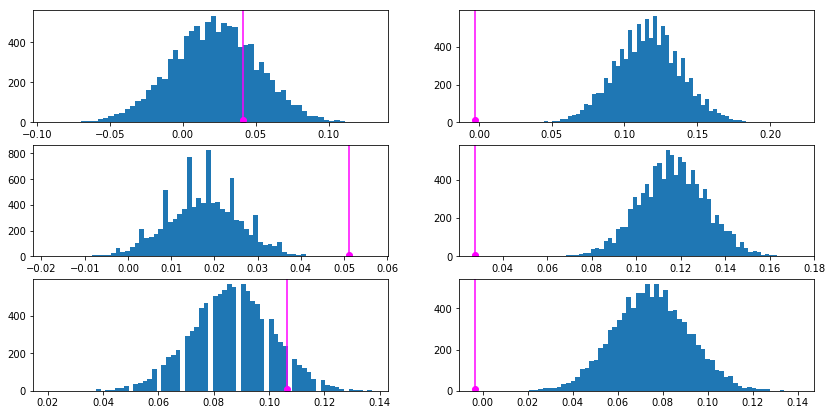

In [20]:
plt.figure(figsize=(14,7))

plt.subplot(3,2,1)
plt.hist(tendency1_alcohol,bins='auto')
plt.plot(T1A,10,'o',label='real',c='magenta')
plt.axvline(T1A, c='magenta')
#plt.xlim(0.010, 0.050)
#plt.ylim(0,800)


plt.subplot(3,2,2)
plt.hist(tendency2_alcohol,bins='auto')
plt.plot(T2A,10,'o',label='real',c='magenta')
plt.axvline(T2A, c='magenta')
#plt.xlim(0.010,0.050)
#plt.ylim(0,800)


plt.subplot(3,2,3)
plt.hist(tendency1_cannabis,bins='auto')
plt.plot(T1C,10,'o',label='real',c='magenta')
plt.axvline(T1C, c='magenta')
#plt.xlim(0,0.09)
#plt.ylim(0,1520)

plt.subplot(3,2,4)
plt.hist(tendency2_cannabis,bins='auto')
plt.plot(T2C,10,'o',label='real',c='magenta')
plt.axvline(T2C, c='magenta')
#plt.xlim(0,0.09)
#plt.ylim(0,1520)

##
plt.subplot(3,2,5)
plt.hist(tendency1_tobacco,bins='auto')
plt.plot(T1T,10,'o',label='real',c='magenta')
plt.axvline(T1T, c='magenta')
#plt.xlim(0.020,0.055)
#plt.ylim(0,2500)


plt.subplot(3,2,6)
plt.hist(tendency2_tobacco,bins='auto')
plt.plot(T2T,10,'o',label='real',c='magenta')
plt.axvline(T2T, c='magenta')
#plt.xlim(0.020,0.055)
#plt.ylim(0,2500)


plt.show()

# CORRELATIONS

In [21]:
# en las matrices de consumo asigno 0 a los no consumidores y 1 a los consumidores
alc=(alcohol>0)*1.0 #consumen alcohol
cann=(cannabis>0)*1.0 #consumen cannabis
tob=(tobacco>0)*1.0 #consumen tobacco
sex=(sexos>1.9)*1.0 #f/m??

In [22]:
tot_nodos=102
tot_sex=int(sex.sum())
correlations=[]
random_corr=[]

for j in range(3):
    
    [a_c,a_t,a_s,c_t,c_s,t_s]=[0,0,0,0,0,0]
    
    tot_al=int(alc[:,j].sum())
    tot_can=int(cann[:,j].sum())
    tot_tob=int(tob[:,j].sum())
    
    pa=(tot_al/tot_nodos)
    pc=(tot_can/tot_nodos)
    pt=(tot_tob/tot_nodos)
    ps=(tot_sex/tot_nodos)

    for i in range(102):

        if alc[i,j]==1:
            if cann[i,j]==1:
                a_c=a_c+1
            if tob[i,j]==1:
                a_t=a_t+1
            if sex[i]==1:
                a_s=a_s+1

        if cann[i,j]==1:
            if tob[i,j]==1:
                c_t=c_t+1
            if sex[i]==1:
                c_s=c_s+1

        if tob[i,j]==1:
            if sex[i]==1:
                t_s=t_s+1
            
    
    correlations.append([a_c/tot_al, a_c/tot_can, a_t/tot_al, a_t/tot_tob, a_s/tot_al, a_s/tot_sex,
           c_t/tot_can, c_t/tot_tob, c_s/tot_can, c_s/tot_sex, t_s/tot_tob, t_s/tot_sex])
    
    random_corr.append(([pa*pc,pa*pc, pa*pt,pa*pt, pa*ps,pa*ps,
                       pc*pt,pc*pt, pc*ps,pc*ps, pt*ps,pt*ps]))

In [23]:
correlations[2][3], random_corr[2][3]

(0.717948717948718, 0.4798154555940023)

In [24]:
#variación porcentual

print('VARIACION PORCENTUAL POR AÑO')
print('')
for j in range(3):
    for i in range(12):
        print(((correlations[j][i]-random_corr[j][i])/random_corr[j][i])*100,'%')
    print('')
    print('************')
    print('')

VARIACION PORCENTUAL POR AÑO

-52.327712609970675 %
34.34917355371902 %
-52.929466588245944 %
153.77157143728274 %
-59.86040318171396 %
-15.638813466653081 %
203.7459575997125 %
481.0792232342326 %
36.62627819022269 %
1.8907837350813326 %
200.00961199577065 %
16.952899591571626 %

************

-55.342136854741895 %
4.201680672268893 %
-45.978391356542616 %
89.07563025210085 %
-56.41646489104117 %
-12.094225797184741 %
88.23529411764707 %
182.3529411764706 %
8.474576271186429 %
-6.233840850330374 %
67.79661016949152 %
-3.303648376903192 %

************

-58.22304173519737 %
-29.638807132963983 %
-54.40955528846154 %
49.630177514792905 %
-60.177353681144076 %
-13.605106291295618 %
10.845940762838278 %
116.00747430706949 %
-23.675994178130434 %
-1.6843314836934513 %
27.529836525925184 %
-15.700616533710468 %

************



#  ALTER/EGO

EGO

$$ \frac{\sum_{i=1}^{134} OUTdegree_i \cdot w_i}{\# edges} $$

ALTER

$$ \frac{\sum_{i=1}^{134} INdegree_i \cdot w_i}{\# edges} $$

In [25]:
#vuelvo a leer los consumos para no hacer quilombo

In [26]:
alcohol= np.loadtxt('alcohol(copia).txt',dtype=int, usecols=(0,1,2))
alcohol=np.array(alcohol)

cannabis= np.loadtxt('cannabis(copia).txt',dtype=int, usecols=(0,1,2))
cannabis=np.array(cannabis)

tobacco = np.loadtxt('tobacco(copia).txt',dtype=int, usecols=(0,1,2))
tobacco =np.array(tobacco)


alcohol=np.delete(alcohol, malos,0)
cannabis=np.delete(cannabis, malos,0)
tobacco=np.delete(tobacco, malos,0)

In [27]:
#NODOS QUE NO COMPLETARON ENCUESTA: ALTER/EGO

nno_info_alcohol1=[]
nno_info_alcohol2=[]
nno_info_alcohol3=[]

nno_info_tobacco1=[]
nno_info_tobacco2=[]
nno_info_tobacco3=[]

nno_info_cannabis1=[]
nno_info_cannabis2=[]
nno_info_cannabis3=[]


for i in range(134):   
    
    
    if alcohol[i][0]==0:
        nno_info_alcohol1.append(i)
    if alcohol[i][1]==0:
        nno_info_alcohol2.append(i)    
    if alcohol[i][2]==0:
        nno_info_alcohol3.append(i)
    
    
    if cannabis[i][0]==0:
        nno_info_cannabis1.append(i)
    if cannabis[i][1]==0:
        nno_info_cannabis2.append(i)    
    if cannabis[i][2]==0:
        nno_info_cannabis3.append(i)
    
    
    if tobacco[i][0]==0:
        nno_info_tobacco1.append(i)
    if tobacco[i][1]==0:
        nno_info_tobacco2.append(i)    
    if tobacco[i][2]==0:
        nno_info_tobacco3.append(i)

In [28]:
# Normalizo los consumos para usarlos como pesos
alcohol=alcohol-1
alcohol=alcohol/alcohol.max()

cannabis=cannabis-1
cannabis=cannabis/cannabis.max()

tobacco=tobacco-1
tobacco=tobacco/tobacco.max()

In [29]:
alcohol[alcohol<0]=0
cannabis[cannabis<0]=0
tobacco[tobacco<0]=0

In [30]:
#calcular bien los edges...

In [31]:
#1er año
GG=G1.copy()
GG.remove_nodes_from(nno_info_alcohol1)
edg1_a=len(GG.edges())

GG=G1.copy()
GG.remove_nodes_from(nno_info_cannabis1)
edg1_c=len(GG.edges())

GG=G1.copy()
GG.remove_nodes_from(nno_info_tobacco1)
edg1_t=len(GG.edges())

#2do año

GG=G2.copy()
GG.remove_nodes_from(nno_info_alcohol2)
edg2_a=len(GG.edges())

GG=G2.copy()
GG.remove_nodes_from(nno_info_cannabis2)
edg2_c=len(GG.edges())

GG=G2.copy()
GG.remove_nodes_from(nno_info_tobacco2)
edg2_t=len(GG.edges())


#3er año

GG=G3.copy()
GG.remove_nodes_from(nno_info_alcohol3)
edg3_a=len(GG.edges())

GG=G3.copy()
GG.remove_nodes_from(nno_info_cannabis3)
edg3_c=len(GG.edges())

GG=G3.copy()
GG.remove_nodes_from(nno_info_tobacco3)
edg3_t=len(GG.edges())

In [32]:
edg1_a,edg1_c,edg1_t

(352, 459, 459)

In [33]:
edg2_a,edg2_c,edg2_t

(310, 456, 456)

In [34]:
edg3_a,edg3_c,edg3_t

(428, 484, 490)

In [35]:
# matriz EGO/ALTER [NODO,CONSUMO,AÑO], CONSUMO=[alcohol, cannabis, tobacco]

def ego_alter(alcohol,cannabis,tobacco):

    EG=np.zeros([134,3,3])
    ALT=np.zeros([134,3,3])
    
    for i in range(134):

        #1er año
        EG[i,0,0]=G1.in_degree[i]*alcohol[i,0]
        ALT[i,0,0]=G1.out_degree[i]*alcohol[i,0]

        EG[i,1,0]=G1.in_degree[i]*cannabis[i,0]
        ALT[i,1,0]=G1.out_degree[i]*cannabis[i,0]

        EG[i,2,0]=G1.in_degree[i]*tobacco[i,0]
        ALT[i,2,0]=G1.out_degree[i]*tobacco[i,0]

        #2año
        EG[i,0,1]=G2.in_degree[i]*alcohol[i,1]
        ALT[i,0,1]=G2.out_degree[i]*alcohol[i,1]

        EG[i,1,1]=G2.in_degree[i]*cannabis[i,1]
        ALT[i,1,1]=G2.out_degree[i]*cannabis[i,1]

        EG[i,2,1]=G2.in_degree[i]*tobacco[i,1]
        ALT[i,2,1]=G2.out_degree[i]*tobacco[i,1]

        #3año
        EG[i,0,2]=G3.in_degree[i]*alcohol[i,2]
        ALT[i,0,2]=G3.out_degree[i]*alcohol[i,2]

        EG[i,1,2]=G3.in_degree[i]*cannabis[i,2]
        ALT[i,1,2]=G3.out_degree[i]*cannabis[i,2]

        EG[i,2,2]=G3.in_degree[i]*tobacco[i,2]
        ALT[i,2,2]=G3.out_degree[i]*tobacco[i,2]
        
    ego_alcohol=[EG[:,0,0].sum()/edg1_a,EG[:,0,1].sum()/edg2_a,EG[:,0,2].sum()/edg3_a]
    alter_alcohol=[ALT[:,0,0].sum()/edg1_a,ALT[:,0,1].sum()/edg2_a,ALT[:,0,2].sum()/edg3_a]

    ego_cannabis=[EG[:,1,0].sum()/edg1_c,EG[:,1,1].sum()/edg2_c,EG[:,1,2].sum()/edg3_c]
    alter_cannabis=[ALT[:,1,0].sum()/edg1_c,ALT[:,1,1].sum()/edg2_c,ALT[:,1,2].sum()/edg3_c]

    ego_tobacco=[EG[:,2,0].sum()/edg1_t,EG[:,2,1].sum()/edg2_t,EG[:,2,2].sum()/edg3_t]
    alter_tobacco=[ALT[:,2,0].sum()/edg1_t,ALT[:,2,1].sum()/edg2_t,ALT[:,2,2].sum()/edg3_t]
    
              
    return [ego_alcohol,alter_alcohol],[ego_cannabis,alter_cannabis],[ego_tobacco,alter_tobacco]

In [36]:
REA_alc=[]
REA_can=[]
REA_tob=[]

iter_hist=1000

for i in range(iter_hist):
    
    alcoholShuff=random_shuff('alcohol(copia).txt')
    alcoholShuff[alcoholShuff<0]=0
    cannabisShuff=random_shuff('cannabis(copia).txt')
    cannabisShuff[cannabisShuff<0]=0
    tobaccoShuff=random_shuff('tobacco(copia).txt')
    tobaccoShuff[tobaccoShuff<0]=0
    
    egoalt_alcohol,egoalt_cannabis,egoalt_tobacco=ego_alter(alcoholShuff,cannabisShuff,tobaccoShuff)
    
    REA_alc.append(egoalt_alcohol)
    REA_can.append(egoalt_cannabis)
    REA_tob.append(egoalt_tobacco)

In [37]:
ego1_alcohol=[]
ego2_alcohol=[]
ego3_alcohol=[]
alter1_alcohol=[]
alter2_alcohol=[]
alter3_alcohol=[]

ego1_cannabis=[]
ego2_cannabis=[]
ego3_cannabis=[]
alter1_cannabis=[]
alter2_cannabis=[]
alter3_cannabis=[]

ego1_tobacco=[]
ego2_tobacco=[]
ego3_tobacco=[]
alter1_tobacco=[]
alter2_tobacco=[]
alter3_tobacco=[]


for i in range(iter_hist):
    
    ego1_alcohol.append(REA_alc[i][0][0])
    ego2_alcohol.append(REA_alc[i][0][1])
    ego3_alcohol.append(REA_alc[i][0][2])
    
    alter1_alcohol.append(REA_alc[i][1][0])
    alter2_alcohol.append(REA_alc[i][1][1])
    alter3_alcohol.append(REA_alc[i][1][2])
    
        
    ego1_cannabis.append(REA_can[i][0][0])
    ego2_cannabis.append(REA_can[i][0][1])
    ego3_cannabis.append(REA_can[i][0][2])
    
    alter1_cannabis.append(REA_can[i][1][0])
    alter2_cannabis.append(REA_can[i][1][1])
    alter3_cannabis.append(REA_can[i][1][2])
    
    
    ego1_tobacco.append(REA_tob[i][0][0])
    ego2_tobacco.append(REA_tob[i][0][1])
    ego3_tobacco.append(REA_tob[i][0][2])
    
    alter1_tobacco.append(REA_tob[i][1][0])
    alter2_tobacco.append(REA_tob[i][1][1])
    alter3_tobacco.append(REA_tob[i][1][2])

In [38]:
EGO1_alcohol=ego_alter(alcohol,cannabis,tobacco)[0][0][0]
EGO2_alcohol=ego_alter(alcohol,cannabis,tobacco)[0][0][1]
EGO3_alcohol=ego_alter(alcohol,cannabis,tobacco)[0][0][2]
    
ALTER1_alcohol=ego_alter(alcohol,cannabis,tobacco)[0][1][0]
ALTER2_alcohol=ego_alter(alcohol,cannabis,tobacco)[0][1][1]
ALTER3_alcohol=ego_alter(alcohol,cannabis,tobacco)[0][1][2]


EGO1_cannabis=ego_alter(alcohol,cannabis,tobacco)[1][0][0]
EGO2_cannabis=ego_alter(alcohol,cannabis,tobacco)[1][0][1]
EGO3_cannabis=ego_alter(alcohol,cannabis,tobacco)[1][0][2]
    
ALTER1_cannabis=ego_alter(alcohol,cannabis,tobacco)[1][1][0]
ALTER2_cannabis=ego_alter(alcohol,cannabis,tobacco)[1][1][1]
ALTER3_cannabis=ego_alter(alcohol,cannabis,tobacco)[1][1][2]


EGO1_tobacco=ego_alter(alcohol,cannabis,tobacco)[2][0][0]
EGO2_tobacco=ego_alter(alcohol,cannabis,tobacco)[2][0][1]
EGO3_tobacco=ego_alter(alcohol,cannabis,tobacco)[2][0][2]
    
ALTER1_tobacco=ego_alter(alcohol,cannabis,tobacco)[2][1][0]
ALTER2_tobacco=ego_alter(alcohol,cannabis,tobacco)[2][1][1]
ALTER3_tobacco=ego_alter(alcohol,cannabis,tobacco)[2][1][2]

In [39]:
ALTER1_alcohol, EGO1_alcohol

(0.48295454545454547, 0.51207386363636365)

In [40]:
ALTER2_alcohol, EGO2_alcohol

(0.60161290322580641, 0.61693548387096775)

In [41]:
ALTER3_alcohol, EGO3_alcohol

(0.58703271028037385, 0.61740654205607481)

In [42]:
ALTER1_cannabis, EGO1_cannabis

(0.140159767610748, 0.16412490922294842)

In [43]:
ALTER2_cannabis, EGO2_cannabis

(0.14619883040935672, 0.16447368421052627)

In [44]:
ALTER3_cannabis, EGO3_cannabis

(0.29132231404958675, 0.33677685950413222)

In [45]:
ALTER1_tobacco, EGO1_tobacco

(0.10130718954248366, 0.10021786492374728)

In [46]:
ALTER2_tobacco, EGO2_tobacco

(0.14692982456140352, 0.15021929824561403)

In [47]:
ALTER3_tobacco, EGO3_tobacco

(0.22142857142857142, 0.24795918367346939)

# ALCOHOL

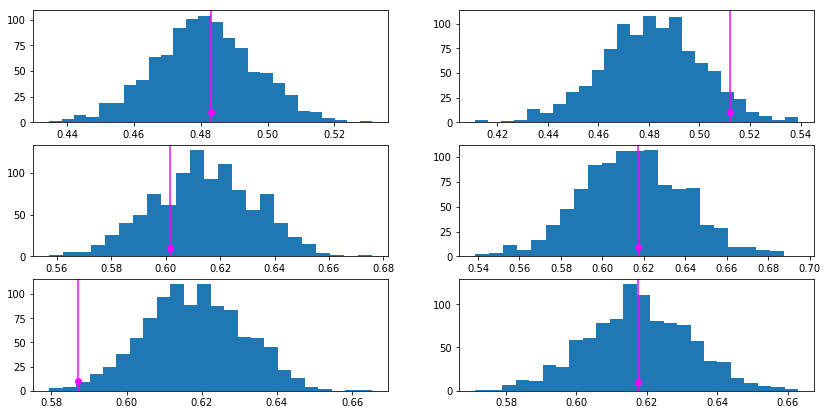

In [48]:
plt.figure(figsize=(14,7))

plt.subplot(3,2,1)
plt.hist(alter1_alcohol,bins='auto')
plt.plot(ALTER1_alcohol,10,'o',label='real',c='magenta')
plt.axvline(ALTER1_alcohol, c='magenta')

plt.subplot(3,2,2)
plt.hist(ego1_alcohol,bins='auto')
plt.plot(EGO1_alcohol,10,'o',label='real',c='magenta')
plt.axvline(EGO1_alcohol, c='magenta')

plt.subplot(3,2,3)
plt.hist(alter2_alcohol,bins='auto')
plt.plot(ALTER2_alcohol,10,'o',label='real',c='magenta')
plt.axvline(ALTER2_alcohol, c='magenta')

plt.subplot(3,2,4)
plt.hist(ego2_alcohol,bins='auto')
plt.plot(EGO2_alcohol,10,'o',label='real',c='magenta')
plt.axvline(EGO2_alcohol, c='magenta')

plt.subplot(3,2,5)
plt.hist(alter3_alcohol,bins='auto')
plt.plot(ALTER3_alcohol,10,'o',label='real',c='magenta')
plt.axvline(ALTER3_alcohol, c='magenta')

plt.subplot(3,2,6)
plt.hist(ego3_alcohol,bins='auto')
plt.plot(EGO3_alcohol,10,'o',label='real',c='magenta')
plt.axvline(EGO3_alcohol, c='magenta')

plt.show()

# CANNABIS

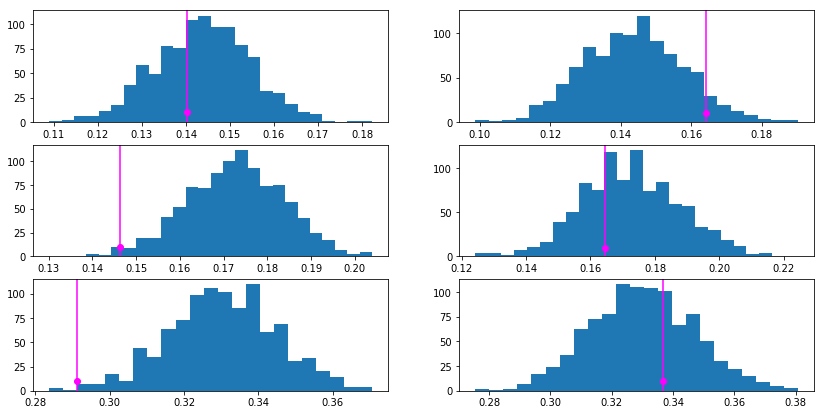

In [49]:
plt.figure(figsize=(14,7))

plt.subplot(3,2,1)
plt.hist(alter1_cannabis,bins='auto')
plt.plot(ALTER1_cannabis,10,'o',label='real',c='magenta')
plt.axvline(ALTER1_cannabis, c='magenta')

plt.subplot(3,2,2)
plt.hist(ego1_cannabis,bins='auto')
plt.plot(EGO1_cannabis,10,'o',label='real',c='magenta')
plt.axvline(EGO1_cannabis, c='magenta')


plt.subplot(3,2,3)
plt.hist(alter2_cannabis,bins='auto')
plt.plot(ALTER2_cannabis,10,'o',label='real',c='magenta')
plt.axvline(ALTER2_cannabis, c='magenta')

plt.subplot(3,2,4)
plt.hist(ego2_cannabis,bins='auto')
plt.plot(EGO2_cannabis,10,'o',label='real',c='magenta')
plt.axvline(EGO2_cannabis, c='magenta')


plt.subplot(3,2,5)
plt.hist(alter3_cannabis,bins='auto')
plt.plot(ALTER3_cannabis,10,'o',label='real',c='magenta')
plt.axvline(ALTER3_cannabis, c='magenta')

plt.subplot(3,2,6)
plt.hist(ego3_cannabis,bins='auto')
plt.plot(EGO3_cannabis,10,'o',label='real',c='magenta')
plt.axvline(EGO3_cannabis, c='magenta')

plt.show()

# TOBACCO

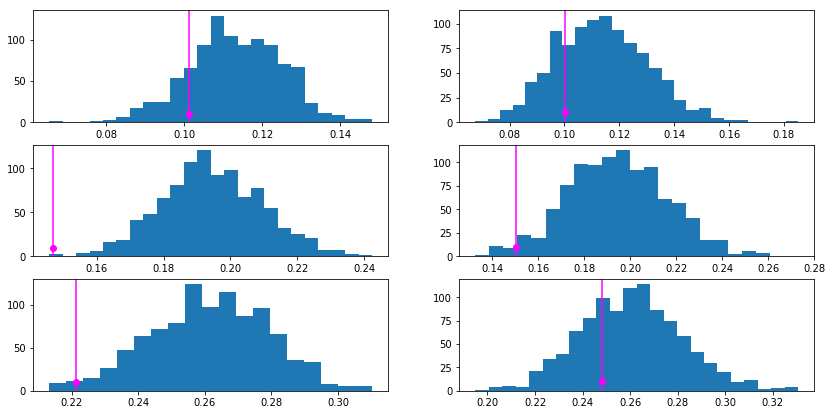

In [50]:
plt.figure(figsize=(14,7))

plt.subplot(3,2,1)
plt.hist(alter1_tobacco,bins='auto')
plt.plot(ALTER1_tobacco,10,'o',label='real',c='magenta')
plt.axvline(ALTER1_tobacco, c='magenta')

plt.subplot(3,2,2)
plt.hist(ego1_tobacco,bins='auto')
plt.plot(EGO1_tobacco,10,'o',label='real',c='magenta')
plt.axvline(EGO1_tobacco, c='magenta')

plt.subplot(3,2,3)
plt.hist(alter2_tobacco,bins='auto')
plt.plot(ALTER2_tobacco,10,'o',label='real',c='magenta')
plt.axvline(ALTER2_tobacco, c='magenta')

plt.subplot(3,2,4)
plt.hist(ego2_tobacco,bins='auto')
plt.plot(EGO2_tobacco,10,'o',label='real',c='magenta')
plt.axvline(EGO2_tobacco, c='magenta')

plt.subplot(3,2,5)
plt.hist(alter3_tobacco,bins='auto')
plt.plot(ALTER3_tobacco,10,'o',label='real',c='magenta')
plt.axvline(ALTER3_tobacco, c='magenta')

plt.subplot(3,2,6)
plt.hist(ego3_tobacco,bins='auto')
plt.plot(EGO3_tobacco,10,'o',label='real',c='magenta')
plt.axvline(EGO3_tobacco, c='magenta')

plt.show()